In [1]:
import numpy as np
import scipy as sp

import openslide

import large_image

import histomicstk as htk
# Import and alias positive_pixel_count
import histomicstk.segmentation.positive_pixel_count as ppc

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams['image.cmap'] = 'gray'
titlesize = 24

INFO:root:Created LRU Cache for 'tilesource' with 204 maximum size
INFO:root:Notice: Could not import PILFileTileSource


# Load input image

In [2]:
inputImageFile = ('/media/jonny_admin/540GB/Research/TCGA_LUAD-WSI/TCGA-44-7669-01A-01-BS1.554eb3d8-6ac6-4a72-a761-ee67021ce97f.svs')

# slide = openslide.OpenSlide(inputImageFile)

In [3]:
ts = large_image.getTileSource(inputImageFile)

INFO:root:Using python for large_image caching


In [4]:
ts.getMetadata()

{'levels': 10,
 'magnification': 40.0,
 'mm_x': 0.0002457,
 'mm_y': 0.0002457,
 'sizeX': 65736,
 'sizeY': 29267,
 'tileHeight': 240,
 'tileWidth': 240}

In [7]:
kwargs = dict(format=large_image.tilesource.TILE_FORMAT_NUMPY)

In [8]:
total_tiles = ts.getSingleTile(**kwargs)['iterator_range']['position']
total_tiles

33428

In [21]:
ts.getSingleTile(tile_position=10000, **kwargs)['tile'].shape[0:2]

(240, 240)

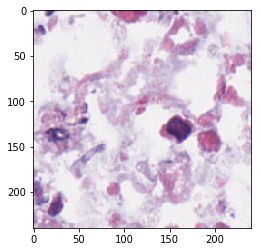

In [19]:
# np.average(ts.getSingleTile(tile_position=10000, **kwargs)['tile'], axis=0)
plt.imshow(ts.getSingleTile(tile_position=10000, **kwargs)['tile'])

In [4]:
large_region = dict(
    left=0, top=0,
    width=28001, height=14652,
)

template_params = ppc.Parameters(
    hue_value=0.05,
    hue_width=0.15,
    saturation_minimum=0.05,
    intensity_upper_limit=0.95,
    intensity_weak_threshold=0.65,
    intensity_strong_threshold=0.35,
    intensity_lower_limit=0.05,
)


stats, = %time ppc.count_slide(inputImageFile, template_params)

print stats

INFO:root:Using python for large_image caching
/home/jonny_admin/bin/HistomicsTK/histomicstk/preprocessing/color_conversion/rgb_to_hsi.py:17: RuntimeWarning: invalid value encountered in divide
  saturations = np.where(intensities, 1 - im.min(0) / intensities, 0)


CPU times: user 1min 5s, sys: 8.02 s, total: 1min 13s
Wall time: 26.4 s
Output(NumberWeakPositive=19973, NumberPositive=3152, NumberStrongPositive=3895, IntensitySumWeakPositive=16289.407843137255, IntensitySumPositive=1637.0078431372551, IntensitySumStrongPositive=651.55555555555543, IntensityAverage=0.68756370251036514, RatioStrongToTotal=0.14415247964470762, IntensityAverageWeakAndPositive=0.77519635400105991)


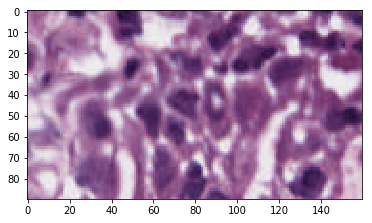

In [16]:
plt.imshow(im_region)
plt.show()

In [22]:
source.getSingleTile()

{'format': 'PIL',
 'gheight': 256.0,
 'gwidth': 256.0,
 'gx': 0.0,
 'gy': 0.0,
 'height': 256,
 'iterator_range': {'level_x_max': 110,
  'level_x_min': 0,
  'level_y_max': 58,
  'level_y_min': 0,
  'position': 6380,
  'region_x_max': 110,
  'region_y_max': 58},
 'level': 7,
 'level_x': 0,
 'level_y': 0,
 'magnification': 20.0,
 'mm_x': 0.0005015,
 'mm_y': 0.0005015,
 'tile': <PIL.Image.Image image mode=RGBA size=256x256 at 0x7F21A407EF90>,
 'tile_overlap': {'bottom': 0, 'left': 0, 'right': 0, 'top': 0},
 'tile_position': {'level_x': 0,
  'level_y': 0,
  'position': 0,
  'region_x': 0,
  'region_y': 0},
 'width': 256,
 'x': 0,
 'y': 0}